# Nama : Raffi Argianda
# NIM : 221351112
# Kelas : Malam B

# Import Library

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv('Pinjaman.csv')
df.head()

,Usia,Pendapatan,Status_Perkawinan,Jumlah_Pinjaman,Durasi_Pinjaman,Status_Pekerjaan,Lulus_Kredit
0,25,40,Belum Menikah,50,5,Karyawan Tetap,Tidak Layak
1,45,100,Menikah,80,10,Wirausaha,Layak
2,35,60,Menikah,100,15,Karyawan Kontrak,Tidak Layak
3,28,75,Belum Menikah,60,7,Karyawan Tetap,Layak
4,50,120,Menikah,150,20,Wirausaha,Layak


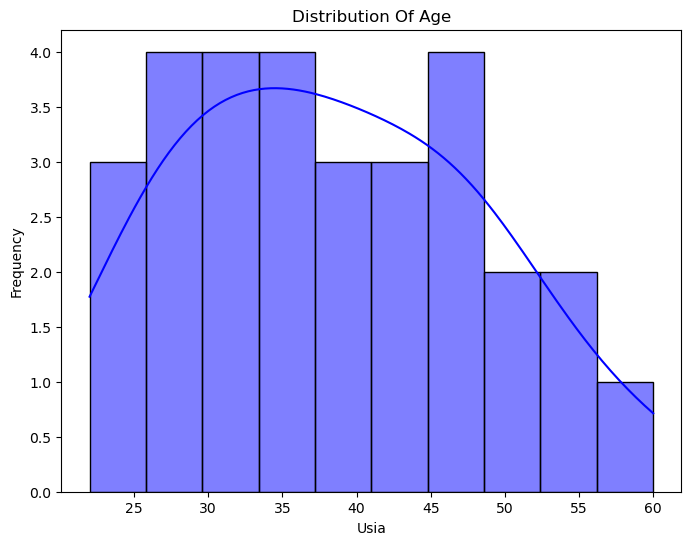

In [3]:
plt.figure(figsize=(8,6))
sns.histplot(df['Usia'], bins = 10, kde = True, color = 'blue')
plt.title('Distribution Of Age')
plt.xlabel('Usia')
plt.ylabel('Frequency')
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20428\730761294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Lulus_Kredit', y = 'Pendapatan', palette = 'Set1')


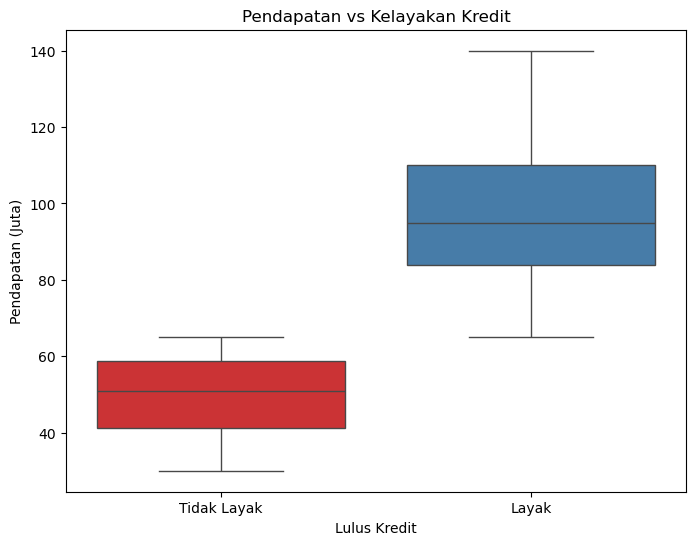

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'Lulus_Kredit', y = 'Pendapatan', palette = 'Set1')
plt.title('Pendapatan vs Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan (Juta)')
plt.xticks(ticks = [0,1], labels = ['Tidak Layak', 'Layak'])
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20428\4045859160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Status_Perkawinan', palette = 'Set2')


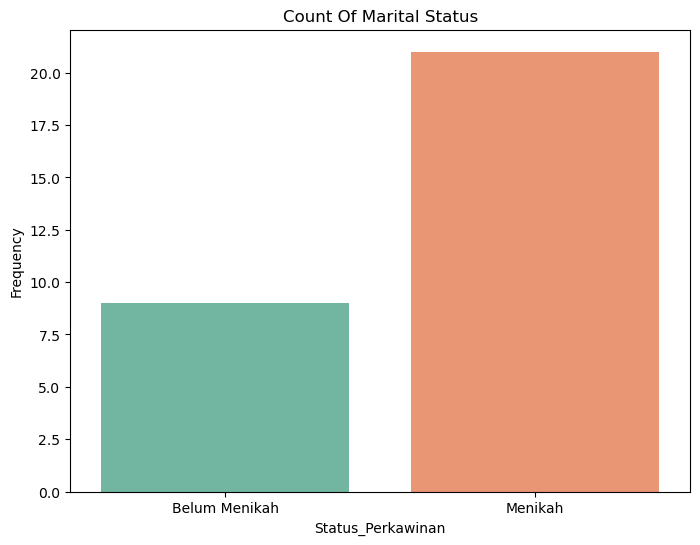

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'Status_Perkawinan', palette = 'Set2')
plt.title('Count Of Marital Status')
plt.xticks(ticks=[0,1], labels = ['Belum Menikah', 'Menikah'])
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

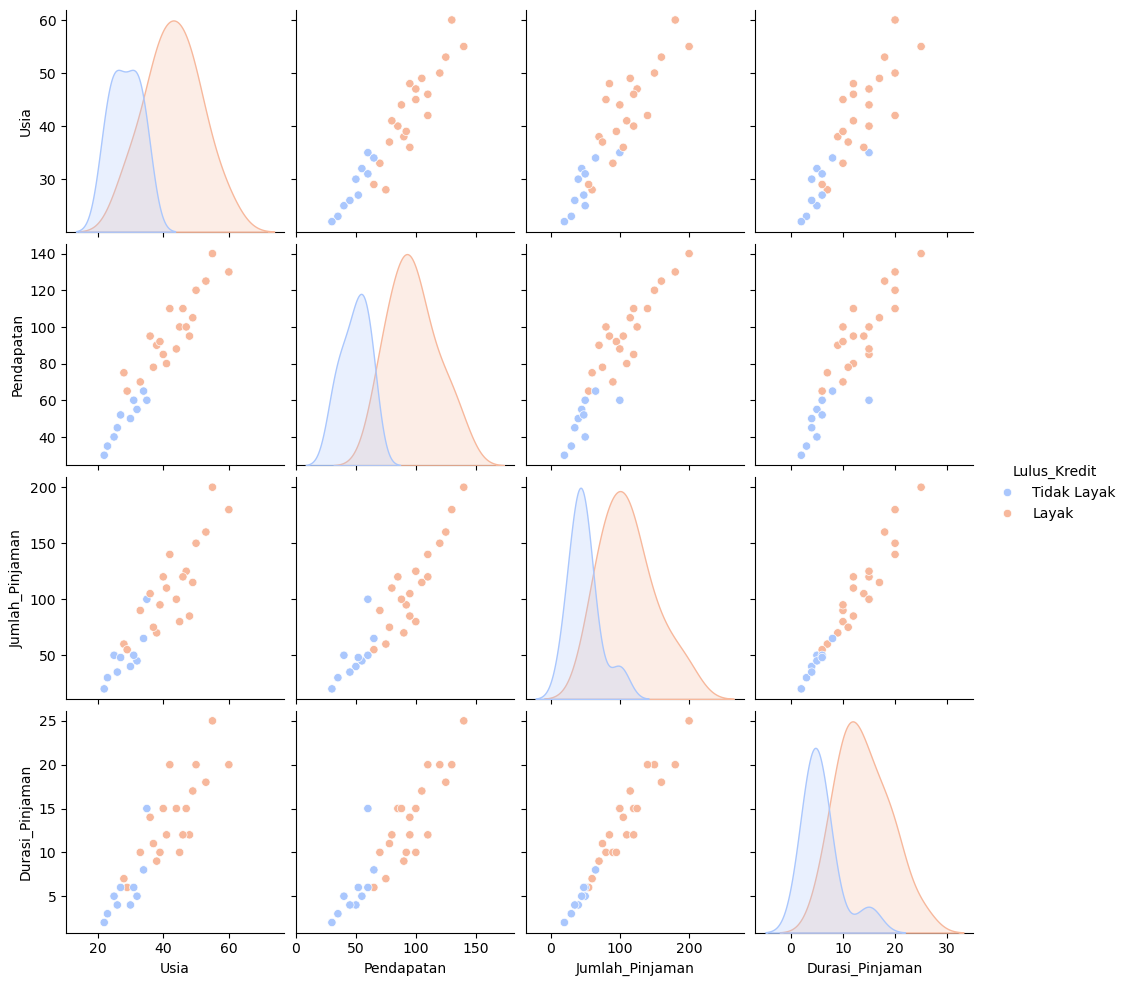

In [6]:
plt.figure(figsize = (8,6))
sns.pairplot(df[['Usia', 'Pendapatan', 'Jumlah_Pinjaman', 'Durasi_Pinjaman', 'Lulus_Kredit']], hue = 'Lulus_Kredit', palette = 'coolwarm')
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20428\1229631657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'Lulus_Kredit', y = 'Jumlah_Pinjaman', palette = 'Set2')


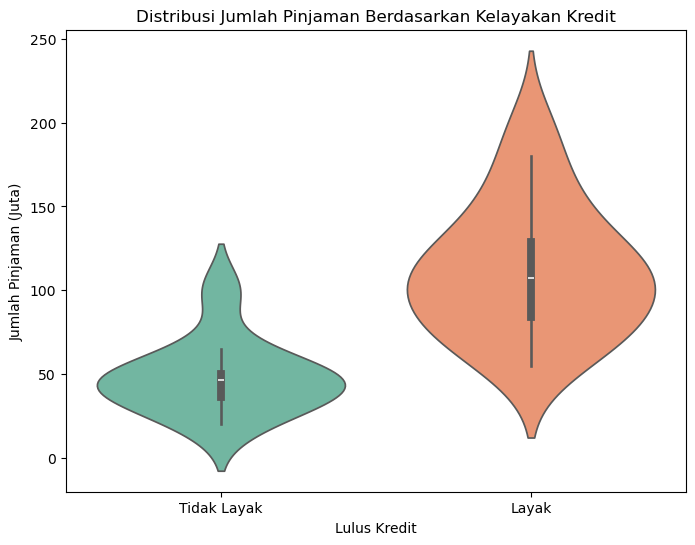

In [7]:
plt.figure(figsize=(8,6))
sns.violinplot(data = df, x = 'Lulus_Kredit', y = 'Jumlah_Pinjaman', palette = 'Set2')
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Jumlah Pinjaman (Juta)')
plt.xticks(ticks =[0,1], labels = ['Tidak Layak', 'Layak'])
plt.show()

In [8]:
label_encoder_status_perkawinan = LabelEncoder()
label_encoder_status_pekerjaan = LabelEncoder()
label_encoder_lulus_kredit = LabelEncoder()

In [9]:
df['Status_Perkawinan'] = label_encoder_status_perkawinan.fit_transform(df['Status_Perkawinan'])
df['Status_Pekerjaan'] = label_encoder_status_pekerjaan.fit_transform(df['Status_Pekerjaan'])
df['Lulus_Kredit'] = label_encoder_lulus_kredit.fit_transform(df['Lulus_Kredit'])

In [10]:
df.to_csv('Pinjam_modif.csv', index = False)

In [11]:
X = df.drop(columns=['Lulus_Kredit'])
y = df['Lulus_Kredit']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
# Example :
# [Usia : 30, Pendapatan : 80, Status Perkawinan : 0, Jumlah Pinjaman : 70, Durasi Pinjaman : 10, Status Pekerjaan : 1]
new_data = np.array([[30, 80, 0, 70, 10, 1]])
new_pred = knn_model.predict(new_data)

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
print('Hasil prediksi : ', new_pred)

Hasil prediksi :  [0]


In [17]:
label_encoder_lulus_kredit.inverse_transform(new_pred)

array(['Layak'], dtype=object)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [19]:
import pickle

filename = 'knn_pinjam_mod.pkl'
pickle.dump(knn_model, open(filename, 'wb'))